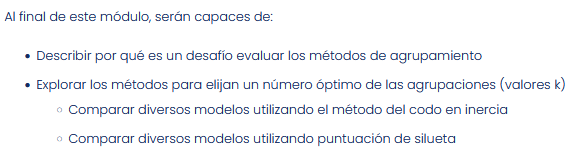

**Métricas de evaluación de agrupamiento**

En las técnicas de aprendizaje no supervisado, como el agrupamiento, no existe una manera razonable para medir si nuestras predicciones son buenas debido a que no tenemos ninguna etiqueta verdadera para comparar nuestras predicciones.

Por ejemplo, digamos que ustedes y sus amigos están a cargo de agrupar diversos restaurantes juntos. Van a agrupar los restaurantes basándose en el tipo de comida que se sirve y sus amigos agruparán los restaurantes basándose en las valoraciones. ¿Cuál de esas técnicas de agrupamiento es correcta? ¿Existe alguna técnica correcta?

En cierto modo, lo evitamos creando métricas heurísticas para evaluar nuestras agrupaciones que nos permiten comparar modelos. Sin embargo, esto todavía no es perfecto y puede que nunca sepamos si nuestros modelos son buenos. Es importante considerar trabajar con expertos en la materia para confirmar los resultados del algoritmo y pensar críticamente sobre las decisiones hechas como resultado del algoritmo.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**¡Nota!**

En el código de abajo solo utilizaremos dos de las características para el agrupamiento.

ESTO NO ES NECESARIO

En general, se tendría que utilizar muchas o todas las características para un buen agrupamiento. Desafortunadamente puede ser difícil de visualizar agrupaciones de diversas características debido a que ocupan un espacio dimensional más grande.

In [5]:
wine = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/1613254703__modified_wine.csv")
df = wine[['malic_acid', 'flavanoids']]
df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


In [6]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

**Metricas**

**1. Inercia**

La “rigidez” es una medida de la similitud de los puntos de datos en un clúster determinado con los demás puntos de datos en el mismo clúster. Una forma de evaluar la rigidez de los clústeres es utilizar un trazado de inercia (inertia) de diferentes números de clústeres (valores k). La inercia de un agrupamiento se determina calculando de la distancia entre cada punto y el centroide de su clúster, elevando al cuadrado esas distancias y sumando los cuadrados.  Esto determina la “rigidez” de cada clúster. 

Si bien es deseable que los clústeres sean rígidos (indicados por una baja inercia), la inercia más baja no es el mejor agrupamiento. Para comprender por qué, consideren que la inercia siempre bajará si agregamos más clústeres. Entre más clústeres haya, menor será la puntuación de inercia.  Para llevar esto al extremo, consideren el número máximo de clústeres: si cada clúster solo consiste en un punto de datos, la inercia sería lo más baja posible.  No es útil tener demasiados clústeres y anula el propósito práctico de la agrupación en primer lugar.  La mejor agrupación es un balance entre el número de clúster más bajo y la inercia más baja. 

**2. Método del codo (elbow method)**

Para encontrar el mejor balance entre la rigidez de los clústeres y el número de los clústeres, crearemos un trazado de la inercia para diversas opciones de k (número de clústeres) y buscaremos el “codo” en el gráfico.  El codo es el lugar donde la reducción drástica en la inercia comienza a nivelarse.  Afortunadamente para nosotros, k-medias almacena la inercia del agrupamiento como un atributo en el que podemos acceder directamente después que el modelo se ajuste.

Text(0, 0.5, 'inertia')

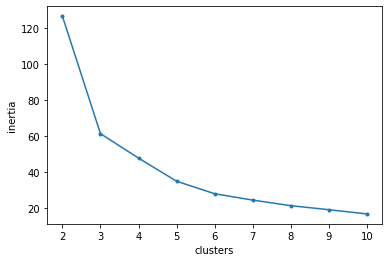

In [7]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_df)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

El código de abajo muestra cómo producir un trazado de inercia vs. clústeres:

En el trazado de línea superior, vemos que el gráfico comienza para nivelarse en 3 clústeres.  Esto se parece a la curva de un brazo, por lo que se llama "codo". Por lo tanto, el 3 sería un candidato para un buen número de clústeres.

Recuerden que la mejor manera de determinar un buen agrupamiento es explorando los clústeres y consultando a un experto en la materia.

**Puntuación de silueta para k-means**

Otra forma de evaluar nuestros clústeres es utilizando el coeficiente de silueta (o como se le llama comúnmente, la puntuación de silueta) La puntuación de silueta es una medida que considera: la rigidez y la separación de cada clúster. Lo hace calculando la distancia entre cada punto de datos y todos los otros puntos de datos en ese mismo clúster y calculando la distancia entre cada punto de datos y los puntos en el clúster más cercano. La mejor puntuación es 1 (señalización de clústeres bien definidos y separados) y la peor es -1. 

De la  [documentación Scikit-Learn para silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

El coeficiente de silueta se calcula a partir de la distancia media intraclúster (a) y la distancia media del clúster más cercano (b) para muestra. El coeficiente de silueta de una muestra es (b - a) / max(a, b). Para clarificar, b es la distancia entre una muestra y el clúster más cercano del que no forma parte la muestra. El coeficiente de silueta solo se define si el número de etiquetas es 2 <= n_labels <= n_samples - 1.

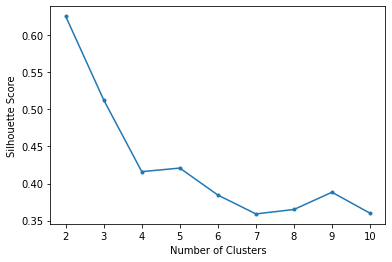

In [8]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');



De acuerdo con el trazado anterior, ¿cuál es el mejor número de clústeres para estos datos? (¡Recuerden que entre más sean altas las puntuaciones de silueta, mejor!) Podemos ver del trazado anterior que 2 sería el mejor número de clústeres para nuestros datos debido a que tiene la puntuación de silueta más alta.

In [9]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.6256358724826118

Para este ejemplo, la puntuación de silueta nos da una diferente sugerencia para el agrupamiento que el trazado de codo de inercias.  Recuerden, no existe una manera precisa de determinar el mejor número de clústeres.  Visualicemos los clústeres 2 y 3 para ver si podemos determinar el mejor clúster visualmente.

In [10]:
# Fit 2 different KMeans models, one with 2 clusters and one with 3 clusters
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

KMeans(n_clusters=3)

<ipython-input-11-de3749e883b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster2'] = kmeans2.labels_
<ipython-input-11-de3749e883b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster3'] = kmeans3.labels_


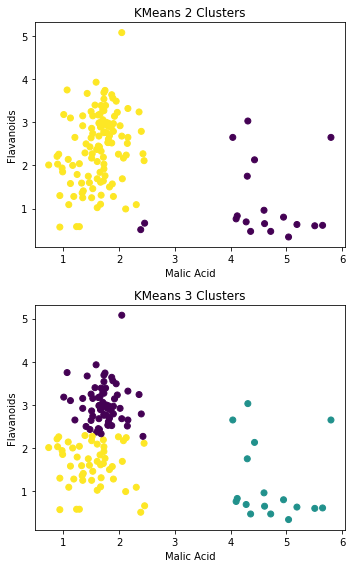

In [11]:
# Save the cluster labels to the dataframe 
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['malic_acid'], df['flavanoids'], c = df['cluster2'])
axes[0].set_xlabel('Malic Acid')
axes[0].set_ylabel('Flavanoids')
axes[0].set_title('KMeans 2 Clusters')
axes[1].scatter(df['malic_acid'], df['flavanoids'], c = df['cluster3'])
axes[1].set_xlabel('Malic Acid')
axes[1].set_ylabel('Flavanoids')
axes[1].set_title('KMeans 3 Clusters')
plt.tight_layout();

Resumen

No existe una sola manera sencilla de determinar el mejor número de clústeres en un modelo de agrupamiento.  Se puede empezar con un trazado de codo de las inercias y las puntuaciones de silueta para diferentes valores de k clústeres.